In [1]:
import numpy as np
import networkx as nx
from networkx import DiGraph
import matplotlib.pyplot as plt
import pickle

In [2]:
import os

# Load graph
# Directory containing pickle files
pickle_dir = '../../data/sub20/graphs/'

# Iterate through pickle files and load graphs
graphs = []
for filename in os.listdir(pickle_dir):
    if filename.endswith('.pickle'):
        with open(os.path.join(pickle_dir, filename), 'rb') as f:
            graphs.append(pickle.load(f))

In [3]:
graph_properties = []

for G in graphs:
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    num_cycles = len(list(nx.simple_cycles(G)))
    is_tree = nx.is_tree(G)
    
    graph_properties.append({
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'num_cycles': num_cycles,
        'is_tree': is_tree
    })

# Display the properties of the first few graphs
for i, props in enumerate(graph_properties[:5]):
    print(f"Graph {i+1}: Nodes={props['num_nodes']}, Edges={props['num_edges']}, Cycles={props['num_cycles']}, Is Tree={props['is_tree']}")

Graph 1: Nodes=279, Edges=292, Cycles=0, Is Tree=False
Graph 2: Nodes=6, Edges=5, Cycles=0, Is Tree=True
Graph 3: Nodes=276, Edges=278, Cycles=0, Is Tree=False
Graph 4: Nodes=271, Edges=284, Cycles=0, Is Tree=False
Graph 5: Nodes=277, Edges=287, Cycles=0, Is Tree=False


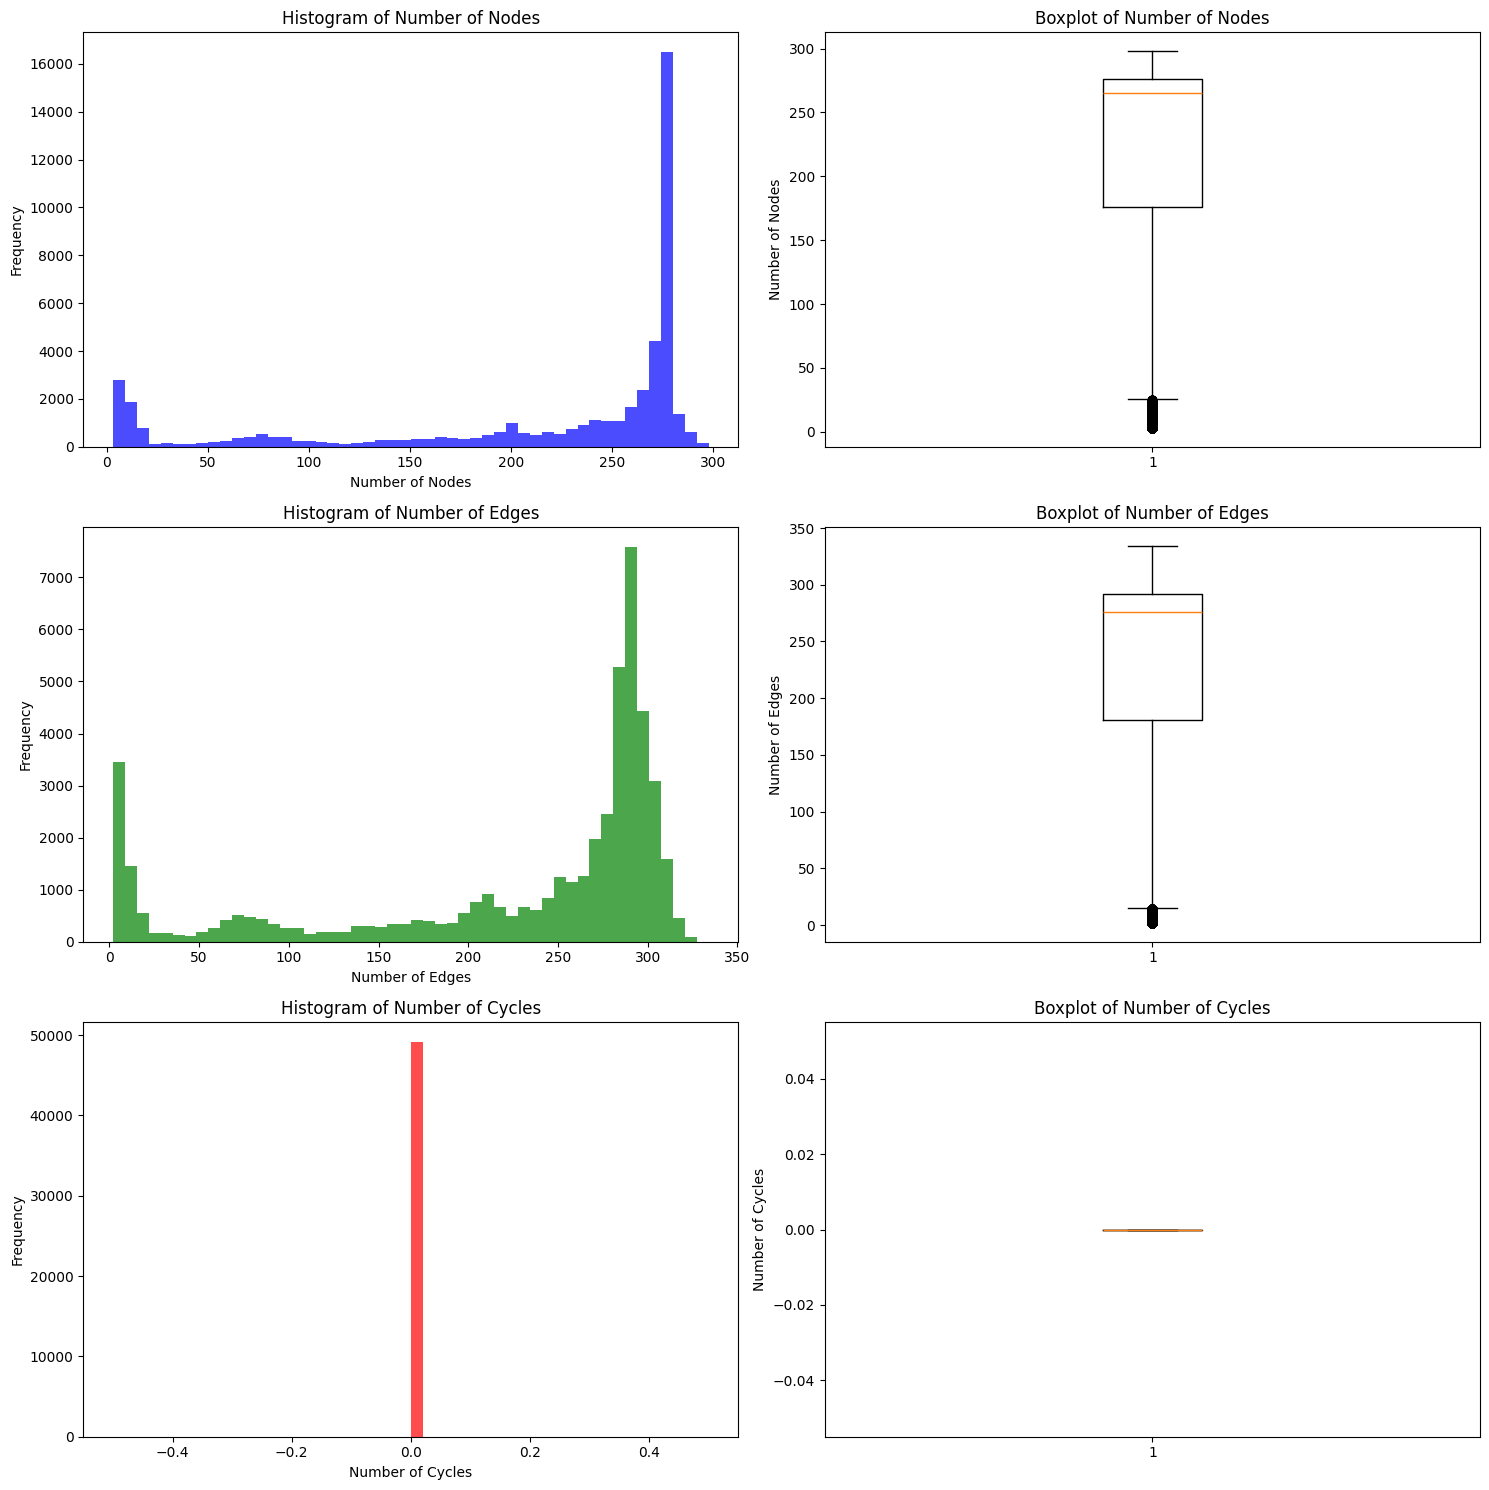

In [4]:
# Extract the number of nodes, edges, and cycles from graph_properties
num_nodes_list = [props['num_nodes'] for props in graph_properties]
num_edges_list = [props['num_edges'] for props in graph_properties]
num_cycles_list = [props['num_cycles'] for props in graph_properties]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot histograms
axs[0, 0].hist(num_nodes_list, bins=50, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Number of Nodes')
axs[0, 0].set_xlabel('Number of Nodes')
axs[0, 0].set_ylabel('Frequency')

axs[1, 0].hist(num_edges_list, bins=50, color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of Number of Edges')
axs[1, 0].set_xlabel('Number of Edges')
axs[1, 0].set_ylabel('Frequency')

axs[2, 0].hist(num_cycles_list, bins=50, color='red', alpha=0.7)
axs[2, 0].set_title('Histogram of Number of Cycles')
axs[2, 0].set_xlabel('Number of Cycles')
axs[2, 0].set_ylabel('Frequency')

# Plot boxplots
axs[0, 1].boxplot(num_nodes_list)
axs[0, 1].set_title('Boxplot of Number of Nodes')
axs[0, 1].set_ylabel('Number of Nodes')

axs[1, 1].boxplot(num_edges_list)
axs[1, 1].set_title('Boxplot of Number of Edges')
axs[1, 1].set_ylabel('Number of Edges')

axs[2, 1].boxplot(num_cycles_list)
axs[2, 1].set_title('Boxplot of Number of Cycles')
axs[2, 1].set_ylabel('Number of Cycles')

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
node_degrees = []

for G in graphs:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    node_degrees.append({
        'in_degrees': in_degrees,
        'out_degrees': out_degrees
    })

# Display the in-degrees and out-degrees of the first few nodes in the first graph
for node, degree in list(node_degrees[0]['in_degrees'].items())[:5]:
    print(f"Node {node}: In-Degree={degree}, Out-Degree={node_degrees[0]['out_degrees'][node]}")

Node 155: In-Degree=0, Out-Degree=8
Node 154: In-Degree=1, Out-Degree=1
Node 135: In-Degree=1, Out-Degree=2
Node 134: In-Degree=1, Out-Degree=3
Node 175: In-Degree=1, Out-Degree=3


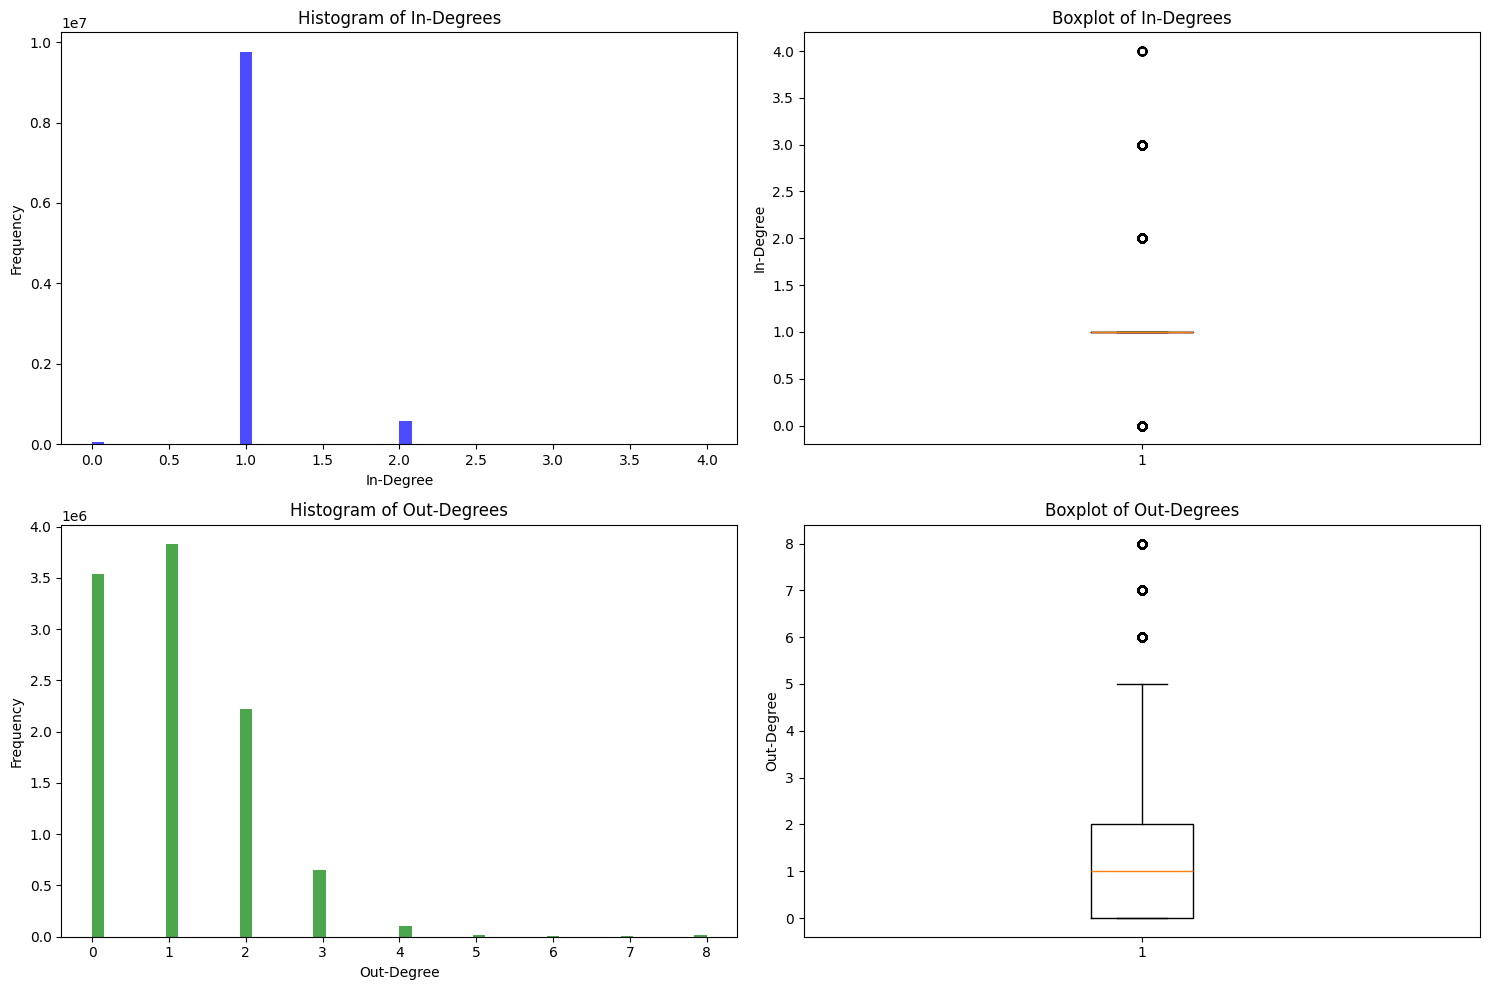

In [6]:
# Extract in-degrees and out-degrees from node_degrees
in_degrees_list = [list(degree['in_degrees'].values()) for degree in node_degrees]
out_degrees_list = [list(degree['out_degrees'].values()) for degree in node_degrees]

# Flatten the lists
in_degrees_flat = [deg for sublist in in_degrees_list for deg in sublist]
out_degrees_flat = [deg for sublist in out_degrees_list for deg in sublist]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms
axs[0, 0].hist(in_degrees_flat, bins=50, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of In-Degrees')
axs[0, 0].set_xlabel('In-Degree')
axs[0, 0].set_ylabel('Frequency')

axs[1, 0].hist(out_degrees_flat, bins=50, color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of Out-Degrees')
axs[1, 0].set_xlabel('Out-Degree')
axs[1, 0].set_ylabel('Frequency')

# Plot boxplots
axs[0, 1].boxplot(in_degrees_flat)
axs[0, 1].set_title('Boxplot of In-Degrees')
axs[0, 1].set_ylabel('In-Degree')

axs[1, 1].boxplot(out_degrees_flat)
axs[1, 1].set_title('Boxplot of Out-Degrees')
axs[1, 1].set_ylabel('Out-Degree')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Only ignition point nodes have in degree of 0
in_degrees_flat = np.array(in_degrees_flat)
number_of_zero_in_degrees = np.sum(in_degrees_flat == 0)
number_of_zero_in_degrees.item()


49125

In [13]:
in_degrees_flat = np.array(in_degrees_flat)
number_of_one_in_degrees = np.sum(in_degrees_flat == 1)
number_of_one_in_degrees.item()

9756218

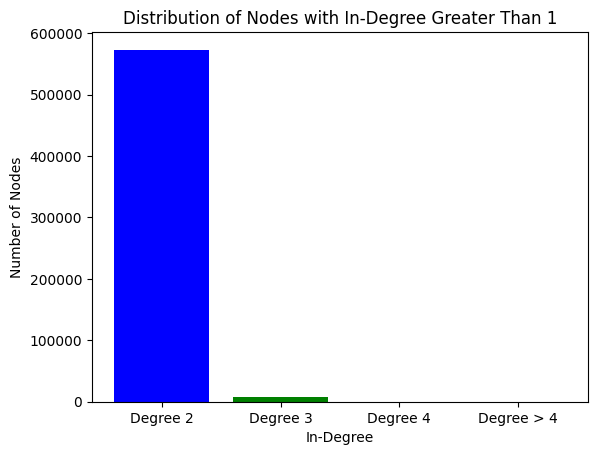

In [18]:
# Show me the distribution of nodes with in-degree greater than 1
degree_two = np.sum(in_degrees_flat == 2)
degree_three = np.sum(in_degrees_flat == 3)
degree_four = np.sum(in_degrees_flat == 4)
degree_five = np.sum(in_degrees_flat > 4)
histogram = [degree_two, degree_three, degree_four, degree_five]
plot_labels = ['Degree 2', 'Degree 3', 'Degree 4', 'Degree > 4']    
plot_colors = ['blue', 'green', 'red', 'purple']
# plot histogram as bar chart
# Plot histogram as bar chart
plt.bar(plot_labels, histogram, color=plot_colors)
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Nodes with In-Degree Greater Than 1')
plt.show()

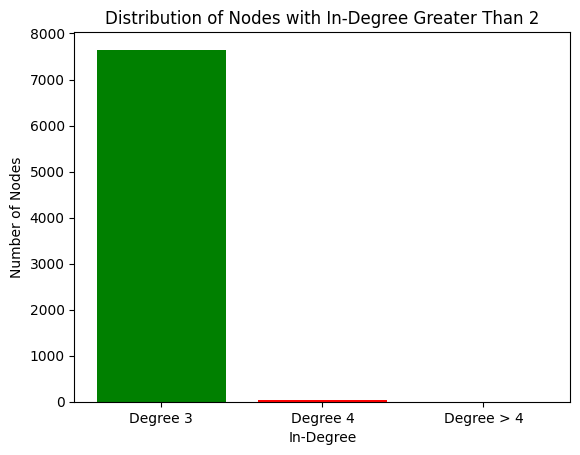

In [19]:
# Show me the distribution of nodes with in-degree greater than 2
degree_three = np.sum(in_degrees_flat == 3)
degree_four = np.sum(in_degrees_flat == 4)
degree_five = np.sum(in_degrees_flat > 4)
histogram = [degree_three, degree_four, degree_five]
plot_labels = ['Degree 3', 'Degree 4', 'Degree > 4']
plot_colors = ['green', 'red', 'purple']

# Plot histogram as bar chart
plt.bar(plot_labels, histogram, color=plot_colors)
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Nodes with In-Degree Greater Than 2')
plt.show()

In [27]:
isolated = 0
for i, graph in enumerate(graphs):
    isolated_nodes = list(nx.isolates(graph))
    if isolated_nodes:
        isolated += len(isolated_nodes)
isolated

0

In [28]:
dag_count = 0
non_dag_count = 0

for graph in graphs:
    if nx.is_directed_acyclic_graph(graph):
        dag_count += 1
    else:
        non_dag_count += 1

print(f'Number of DAGs: {dag_count}')
print(f'Number of non-DAGs: {non_dag_count}')

Number of DAGs: 49125
Number of non-DAGs: 0


In [32]:
one_node_count = 0

for graph in graphs:
    if graph.number_of_nodes() == 1:
        one_node_count += 1

print(f'Number of graphs with only one node: {one_node_count}')

Number of graphs with only one node: 0
